# CAPSTONE PROJECT : ON WALMART STORES SALES PREDICTION

# Problem statement : Provided with historical sales data for 45 Walmart stores of a Retail chain located in different regions. Each stores contains a number of departments, and task given is predicting the department wide sales for each store.

The data is provided in  4 different CSVs.

In addition, Walmart runs several promotional markdown events throughout the year. 

These markdowns precede prominent holidays, the four largest of which are:

1.The Super Bowl

2.Labor Day

3.Thanksgiving

4.Christmas

The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

# Part of the challenge presented by this competition is "modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data".

In [67]:
# import basic packages
import pandas as pd # for data preprocessing
import numpy as np # for linear algebra
import datetime # for manupulating date and time

#for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [68]:
# Loading dataset

features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")


## Find the shape and preview the dataset by using list function and further "for loop" to iterate through each list, this list runs through each DataFrame present in the list

In [69]:
# To print the shape and display first five rows of the dataset
df_names=['features','stores','train','test']
df_list=[features,stores,train,test]

# using for loop to iterate through each item in the above list and loop runs for each DataFrame 
# ---present in the list
for i in range(4):
    print('--'*15)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*15)
    display(df_list[i].head(5))

------------------------------
Dataframe features has 8190 rows and 12 columns.
------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


------------------------------
Dataframe stores has 45 rows and 3 columns.
------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


------------------------------
Dataframe train has 421570 rows and 5 columns.
------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


------------------------------
Dataframe test has 115064 rows and 4 columns.
------------------------------


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## To check the Time duration of records of given dataset

In [70]:
# checking time duration of records
for i in [0,2,3]:
    print(f'Dataframe {df_names[i]} contains data from {df_list[i].Date.min()} to {df_list[i].Date.max()}.\n')

Dataframe features contains data from 2010-02-05 to 2013-07-26.

Dataframe train contains data from 2010-02-05 to 2012-10-26.

Dataframe test contains data from 2012-11-02 to 2013-07-26.



## Looping through DataFrames to check the missing values in every column of each DataFrame:

In [71]:
# checking missing values

for i in range(4):
    print(f'Dataframe {df_names[i]} has missing values.\n') if (df_list[i].isna().sum().any()==True) else print(f'Dataframe {df_names[i]} does not have missing values.')
   

Dataframe features has missing values.

Dataframe stores does not have missing values.
Dataframe train does not have missing values.
Dataframe test does not have missing values.


## Install the missinngo for filling the missing values

In [72]:
!pip install missingno

## Import missingno as msno: This line imports the missingno library and gives it an alias msno for easier access. Missingno library offers a very nice way to visualize the distribution of NaN values. 

## Explaination for using missingno library for easier access to missing values?

This visualization provides a quick overview of the missing data pattern within the features DataFrame.

It helps in identifying columns with a high percentage of missing values, which can guide decisions on data cleaning or handling missing values in further analysis.

<Axes: >

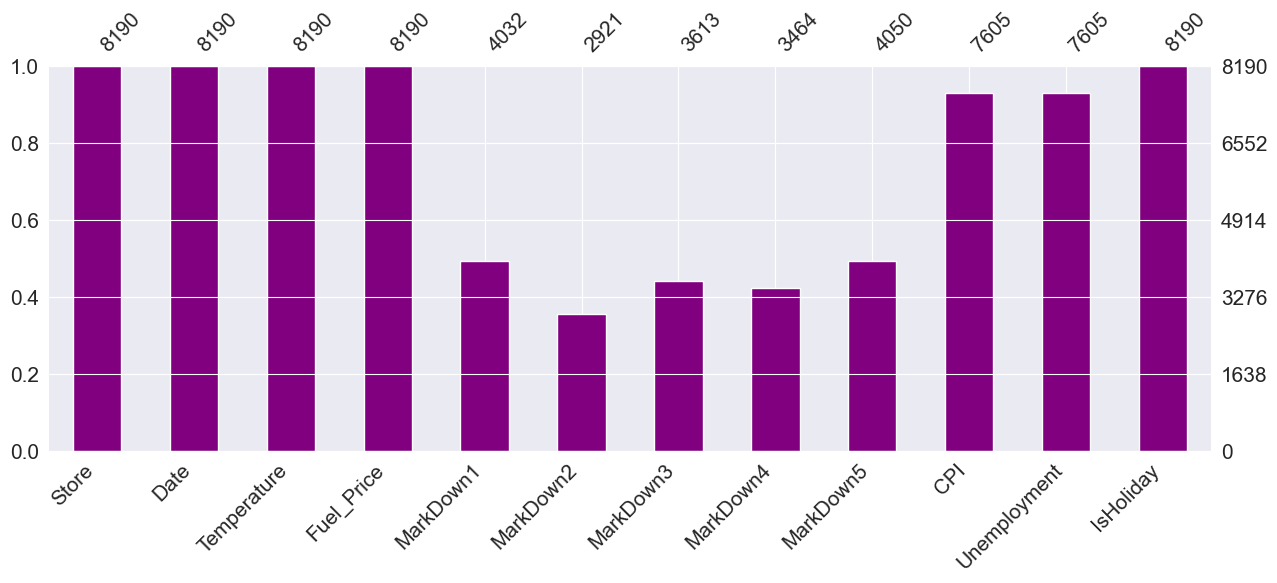

In [73]:
import missingno as msno  
msno.bar(features, figsize=(15, 5), fontsize=15, color='purple')

## Output explaination:

Running this code will create a bar chart visualization that represents the distribution of missing values (NaN) in the features DataFrame.

Each bar in the chart represents a column in the DataFrame, and the height of the bar indicates the proportion of missing values in that particular column.

If a column has no missing values, its corresponding bar will be full (reaching the top of the chart). If there are missing values, the bar will show the percentage or count of missing values relative to the total number of rows in that column.


## Explaination for using Percentage of missing values code

The code provides insights into the completeness of data within each column of the features DataFrame by displaying the percentage of missing values for each column. 

Columns with higher percentages indicate a larger proportion of missing data, which might require attention during data preprocessing or analysis.

In [74]:
print('Percentage of missing values in features dataframe.')
(100*features.isna().sum()/features.shape[0]).sort_values()

Percentage of missing values in features dataframe.


Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
IsHoliday        0.000000
CPI              7.142857
Unemployment     7.142857
MarkDown5       50.549451
MarkDown1       50.769231
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown2       64.334554
dtype: float64

## Output explaination:

print('Percentage of missing values in features dataframe.'): This line prints a header or title indicating the output that follows, stating that the output will show the percentage of missing values in the features DataFrame.

The sorted percentages of missing values for each column in the features DataFrame are displayed. Each row will represent a column, and the value in each row will be the percentage of missing values in that column, sorted in ascending order.



## Observation of percentage of missing values
 
 All the MarkDown columns have more than 50% missing values. 
These are anonymized data related to promotional markdowns that the retail chain is running. MarkDown data is only available after Nov 2011. 
So, it's quite difficult to choose best imputation technique. If correlation of these columns is not strong with target variable, I will drop them. 
Let's do EDA first.

# EXPLORATORY DATA ANALYSIS (EDA)

## The EDA is one of the most important parts of the process, because will gives you an idea about the relationship of the features, your distribution, and so on.

## Plotting the pie chart to find distrubution of different types of stores based on the counts of each store type within the "stores DataFrame"

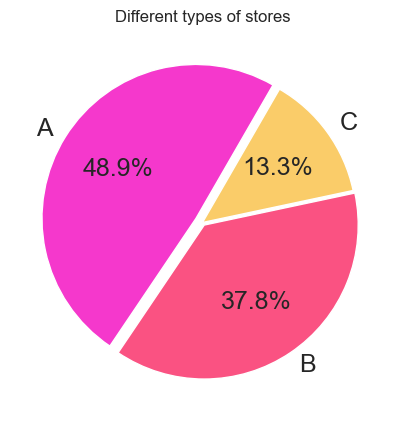

In [75]:
labels = stores.Type.value_counts().index.tolist()
sizes = stores.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=60,
        textprops={'fontsize': 18},colors=['#f538cc','#fa5282','#facc69'])
plt.title('Different types of stores');

In [76]:
# Display unique values in the 'Type' column
print(stores['Type'].unique())
stores['Type'] = stores['Type'].astype('category')


['A' 'B' 'C']


## Using Seaborn and Matplotlib to create a count plot and annotate the bars with the number of stores represented by each bar.

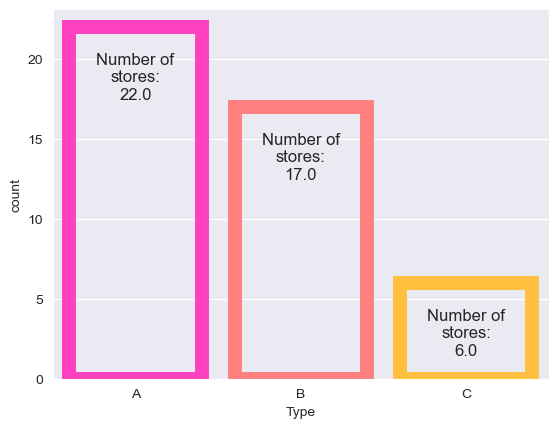

In [77]:
ax = sns.countplot(data=stores, x='Type', facecolor=(0, 0, 0, 0), linewidth=10, edgecolor=sns.color_palette("spring", 3))


# using for loop
for p in ax.patches:
    ax.annotate(f'Number of\nstores:\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-4),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()  # Display the plot


## Observations from the above plot:From the above displot we can see Type A stores are more , next comes Type B and Type C the lowest

## Barplot using seaborn to visualize the sizes of different stores.

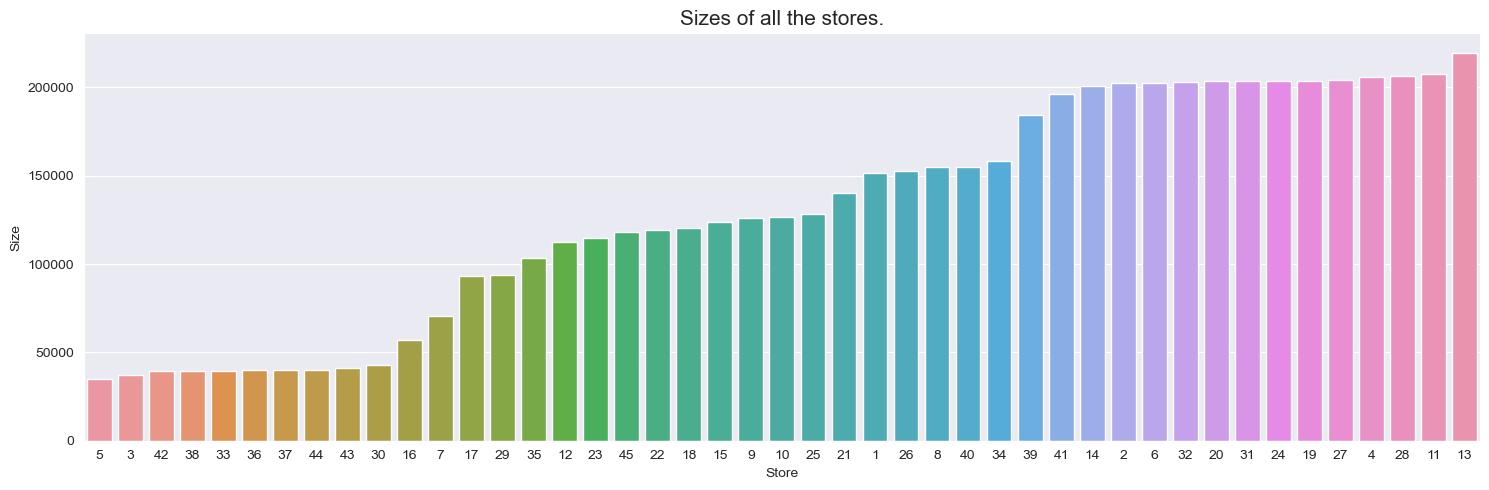

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout(); # adjust the layout of the plot to prevent overlapping elements and improve readability

## Observations from bar chart:There are broadly 3 types of stores: 

1.Small-sized

2.Medium-sized 

3.Large-sized 

This numerical variable can be converted into categorical variable using pd.cut function but first let's check relation between size and type of the stores.

## Using Seaborn to create a box plot that compares the sizes of different types of stores

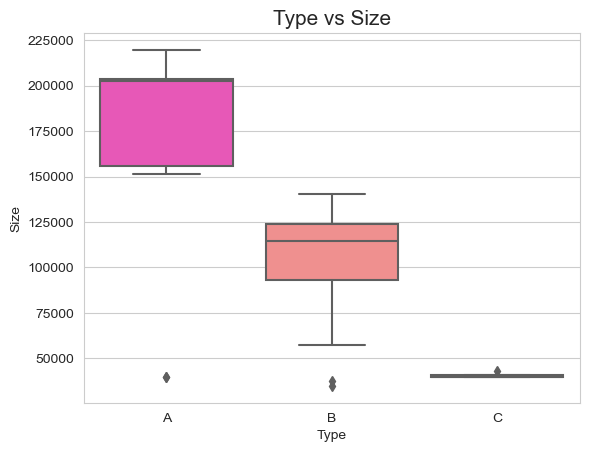

In [79]:
sns.set_style('whitegrid')
sns.boxplot(x='Type',y='Size',data=stores,palette='spring')
plt.title('Type vs Size',fontsize=15);

## Observation from above plot:Though we don't have any knowledge about how stores were divided into these types, we can see from the graph that it covers the effect of size column.

## Data merging and mannipulation to combine multiple DataFrames(train, test, features, stores) for further analysis

In [80]:
train_expanded = train.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
train_expanded = train_expanded.merge(stores, how='inner', on=['Store'])

test_expanded = test.merge(features, how='inner',on=['Store','Date','IsHoliday']).sort_values(by=
                            ['Store','Dept','Date']).reset_index(drop=True)
test_expanded = test_expanded.merge(stores, how='inner', on=['Store'])

# converting dtype of date column
train_expanded['Date'] = pd.to_datetime(train_expanded['Date'])
test_expanded['Date'] = pd.to_datetime(test_expanded['Date'])

In [81]:
# preview the merged dataset
train_expanded.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


## Line plot to visualize the "Average weekly sales of the company across all the stores over a given timeframe"

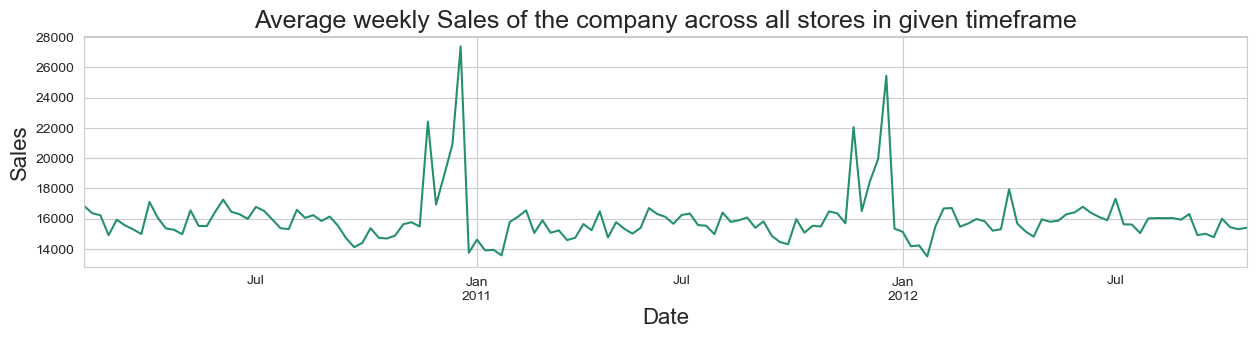

In [82]:
plt.figure(figsize=(15,3))
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

## Creating 3 new features from date column using the line graph

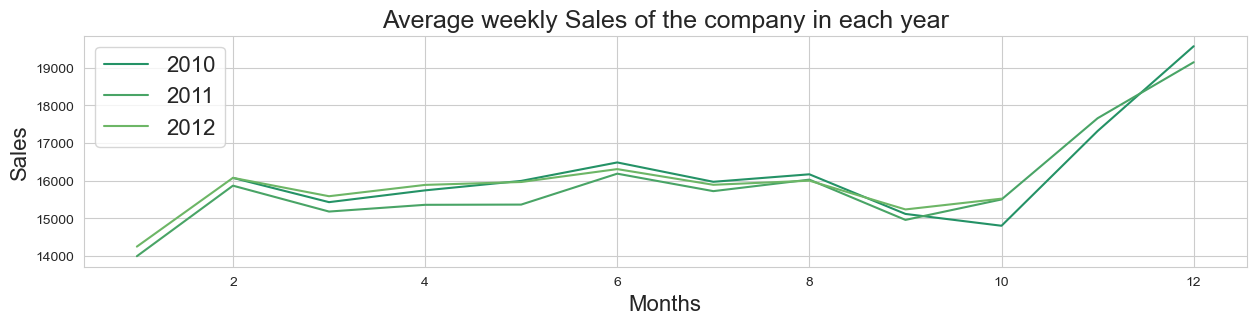

In [83]:
for df in [train_expanded,test_expanded]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_expanded[train_expanded['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company in each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

## Oservation from the above two line plots: From the above line graph we can observe the peak sales was during end of the year or 12th month especially during Chirstmas in all the three consecutive years

## Creating a line plot to visualize the "Average Weekly sales of the company across different types of stores for each month"

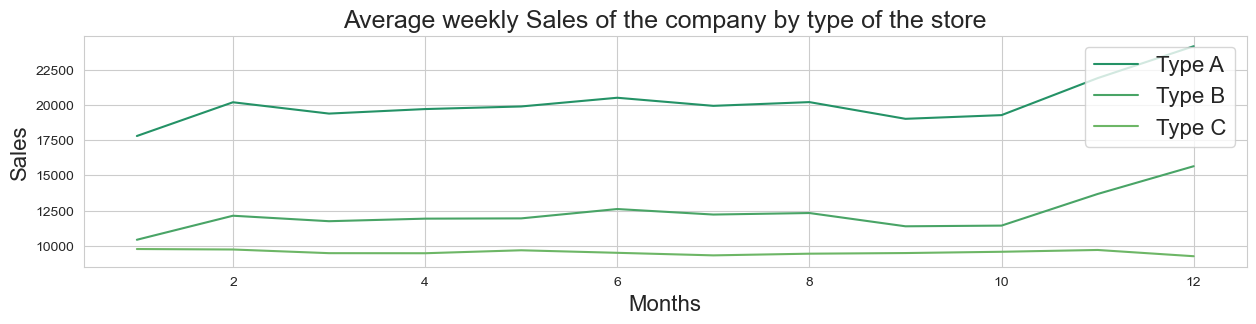

In [84]:
plt.figure(figsize=(15,3))
train_expanded[train_expanded['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_expanded[train_expanded['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company by type of the store', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

## Observation from the line plot : Sales of the company see rise during the end of the year. Possible reasons could be any tradition or festival (like Christmas) in that company. Further Type A stores seem to have comparitively high sales, but this can be due to difference in number of stores of different type. Also, we can notice that sales of type C are constant over the year.

## Bar plot to visualize the "Average Weekly sales of the company based on a specified categorical variable within a given timefree"

## Purpose of the (def av_sales_plotter) Function:
This function generates a bar plot to visualize the average weekly sales across different categories defined by the input variable (str). 

It computes and compares the average sales for each category, providing a clear overview of the sales performance among different categories.

## Average sales store wise

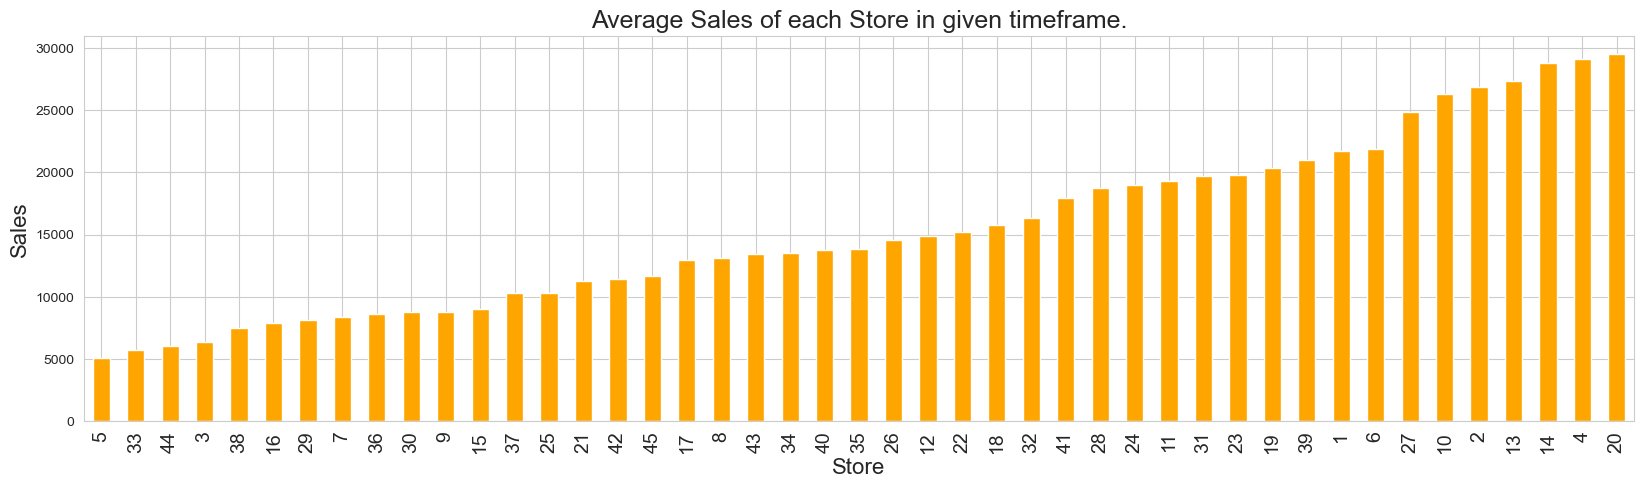

In [85]:
def av_sales_plotter(str):
    plt.figure(figsize=(20,5))
    train_expanded.groupby(str).mean()['Weekly_Sales'].sort_values().plot(kind='bar',color='orange')
    plt.title(f'Average Sales of each {str} in given timeframe.', fontsize=18)
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(str, fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    
av_sales_plotter('Store')

## Average sales Department wise

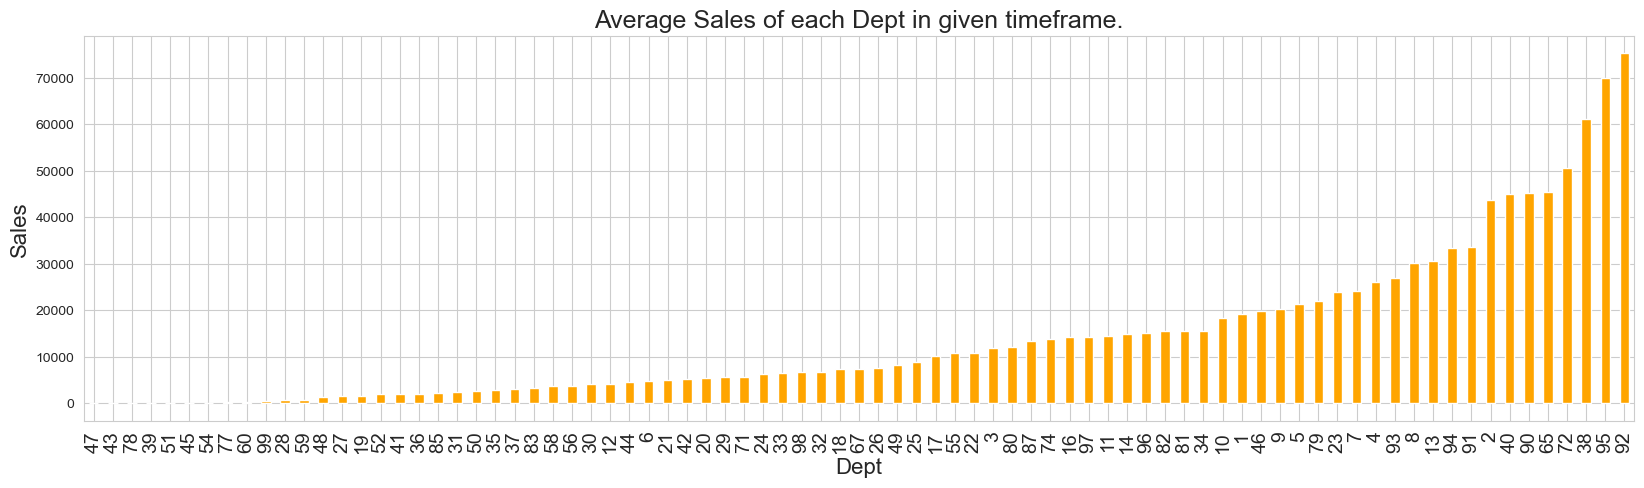

In [86]:
av_sales_plotter('Dept')

## Observation from above bar graph:Around 10 departments have lowest sales. The company can further analyse as to what are the possible reasons and how it can be improved.

## Using Stripplot  and Vilolinplot to compare the distribution of Weekly_sales Vs IsHoliday(categorical variable type)

## The "stripplot" displays individual data points, showcasing the distribution more directly and the "violin plot" provides a visual representation of the data distribution including its density.

IsHoliday vs Weekly_Sales


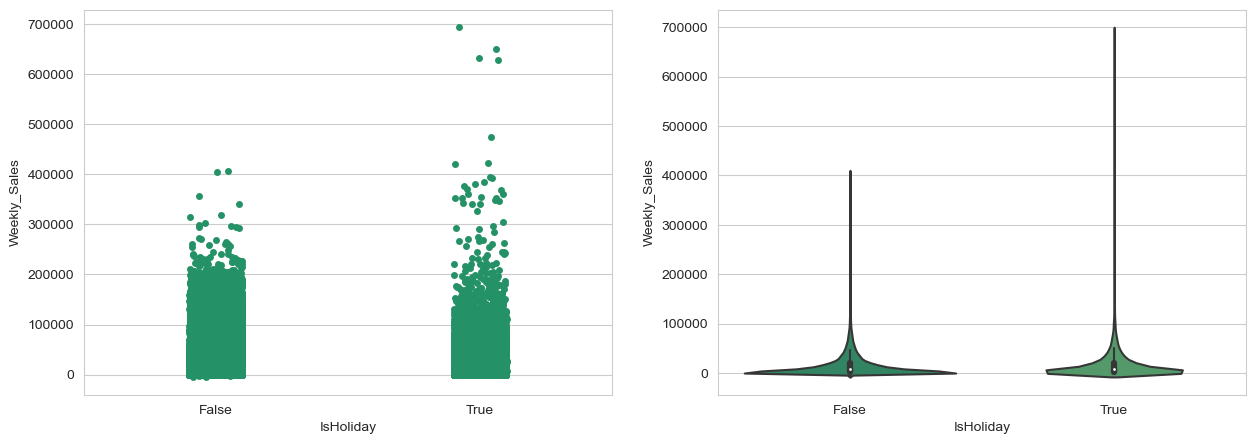

In [87]:
 print('IsHoliday vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_expanded['Weekly_Sales'],x=train_expanded['IsHoliday']) 
plt.subplot(1,2,2)

sns.violinplot(y=train_expanded['Weekly_Sales'],x=train_expanded['IsHoliday']); 

## Output of the plots

The left subplot (subplot 1) displays a strip plot where each dot represents a data point of weekly sales, distinguished by whether it's a holiday or not.

The right subplot (subplot 2) displays a violin plot representing the distribution of weekly sales, providing insights into the density and spread of sales for holidays and non-holidays separately.

## Observation from subplots: Highest sales events were recorded in the special holiday week.

## Compare the distribution of weekly sales (Weekly_Sales) across different types of stores represented by the categorical variable Type.

Type vs Weekly_Sales


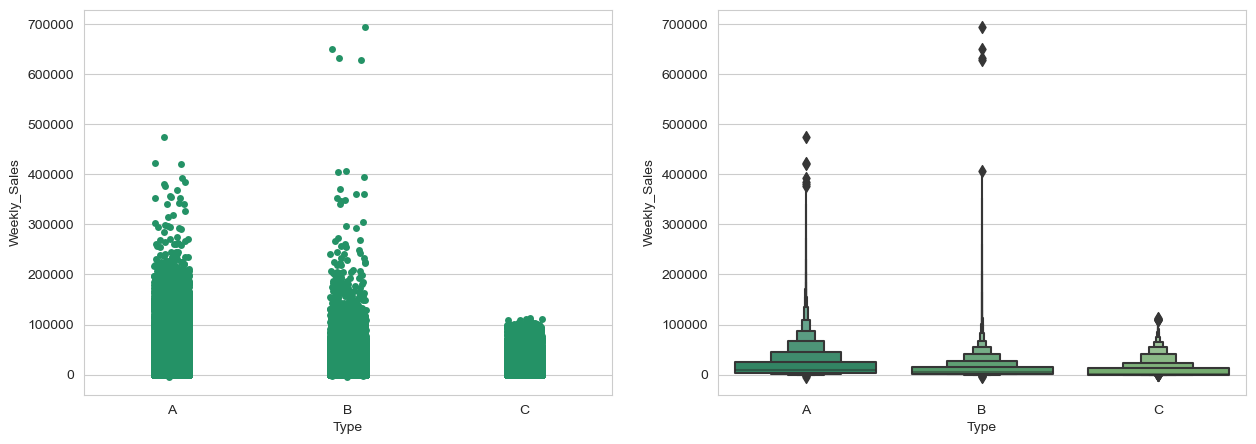

In [88]:
print('Type vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_expanded['Weekly_Sales'],x=train_expanded['Type'])
plt.subplot(1,2,2)
sns.boxenplot(y=train_expanded['Weekly_Sales'],x=train_expanded['Type']);

## Output of the plots:
The left subplot (subplot 1) displays a strip plot where each dot represents a data point of weekly sales, differentiated by the type of store.

The right subplot (subplot 2) displays a boxen plot showing the distribution of weekly sales for each type of store, providing insights into the central tendency, spread, and outliers of sales across different store types.

## Observation from the above subplots:Highest sales events were recorded in the type B stores.

## Using Seaborn's jointplot() function to create a joint plot to visualize the relationship between the "Weekly_Sales and Size columns from the train_expanded" dataset. 

## Explaination for using the scatter plot:

This joint plot is used to visually explore and analyze the relationship or correlation between the weekly sales and the size 
of the stores.

The scatter plot in the center shows the relationship between the two variables, while the histograms on the sides display 
the distributions of each individual variable.

Weekly sales vs size


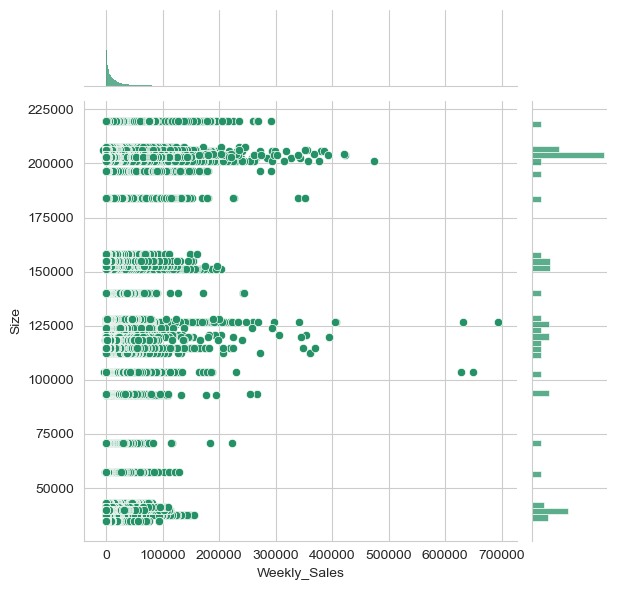

In [89]:
print('Weekly sales vs size')
sns.jointplot(x='Weekly_Sales', y='Size', data=train_expanded)
plt.show()  # Display the plot

## Observation from the jointplot :Their is No specific pattern of weekly sales and thier size

## Output:

The resulting joint plot displays a scatter plot where each point represents a store, with 'Weekly Sales' on the x-axis and 'Size' on the y-axis, providing an overview of the relationship between these two variables. 

Additionally, it shows the marginal distributions of both 'Weekly Sales' and 'Size' along the respective axes, allowing insights into their distributions and relationship.

## Subplotting to draw insights from different columns againist Date column

The purpose of this subplot is to visualize the trends and relationships of various features (Temperature, Fuel_Price, CPI, Unemployment) over time (Date).

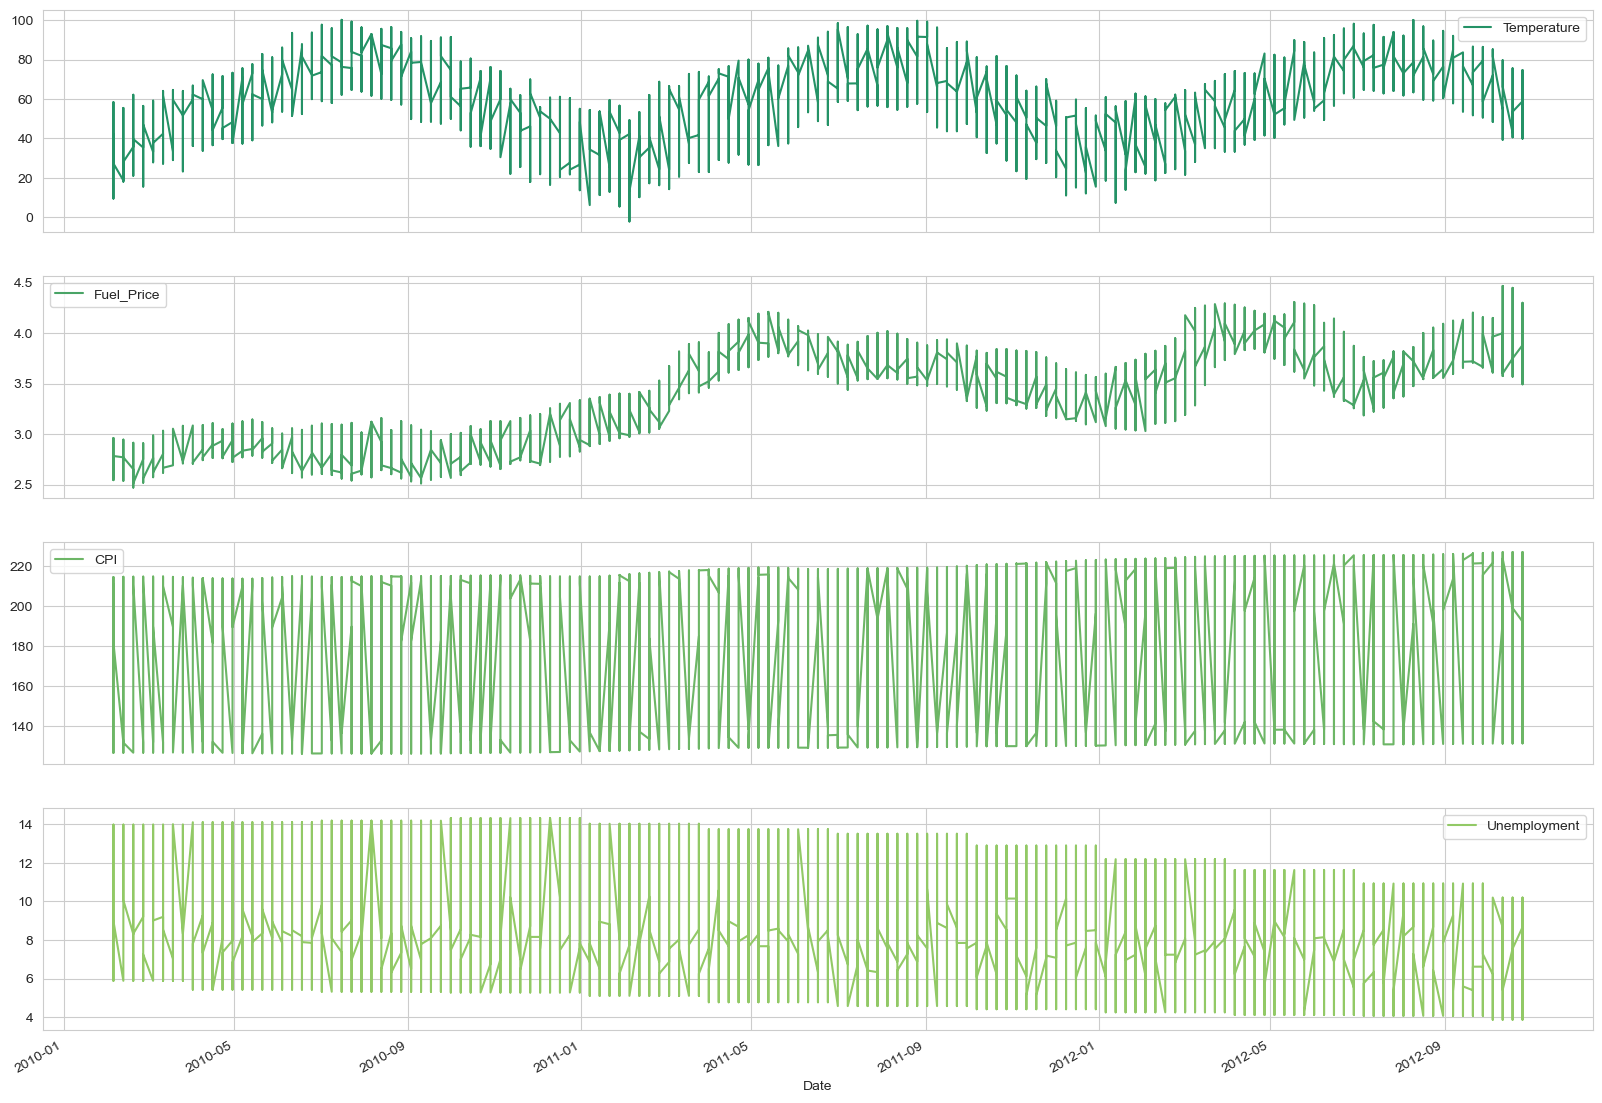

In [90]:
train_expanded[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15));

# Output:
The code generates subplots where each subplot represents a line plot of one of the selected columns (Temperature, Fuel_Price, CPI, Unemployment) against the Date.

Each subplot is vertically stacked and arranged in a grid. The x-axis represents the dates, while the y-axis represents the values of the respective columns.

This visualization allows for an easy comparison of the trends and patterns of these features over the timeline covered by the Date column in the train_expanded DataFrame.

## Observation from subplot: As expected, temperature has high seasonality. Week and month column can effectively cover its effect. Fuel price and CPI show an upward trend and unemployment shows downward trend. Let's explore effect of these feature with weekly sales.

## Using the Pair plot of Weekly_Sales Vs othered specified features

The pair plot is created to visualize relationships and distributions between Weekly_Sales (the target variable) and the other specified features (Temperature, Fuel_Price, CPI, Unemployment).

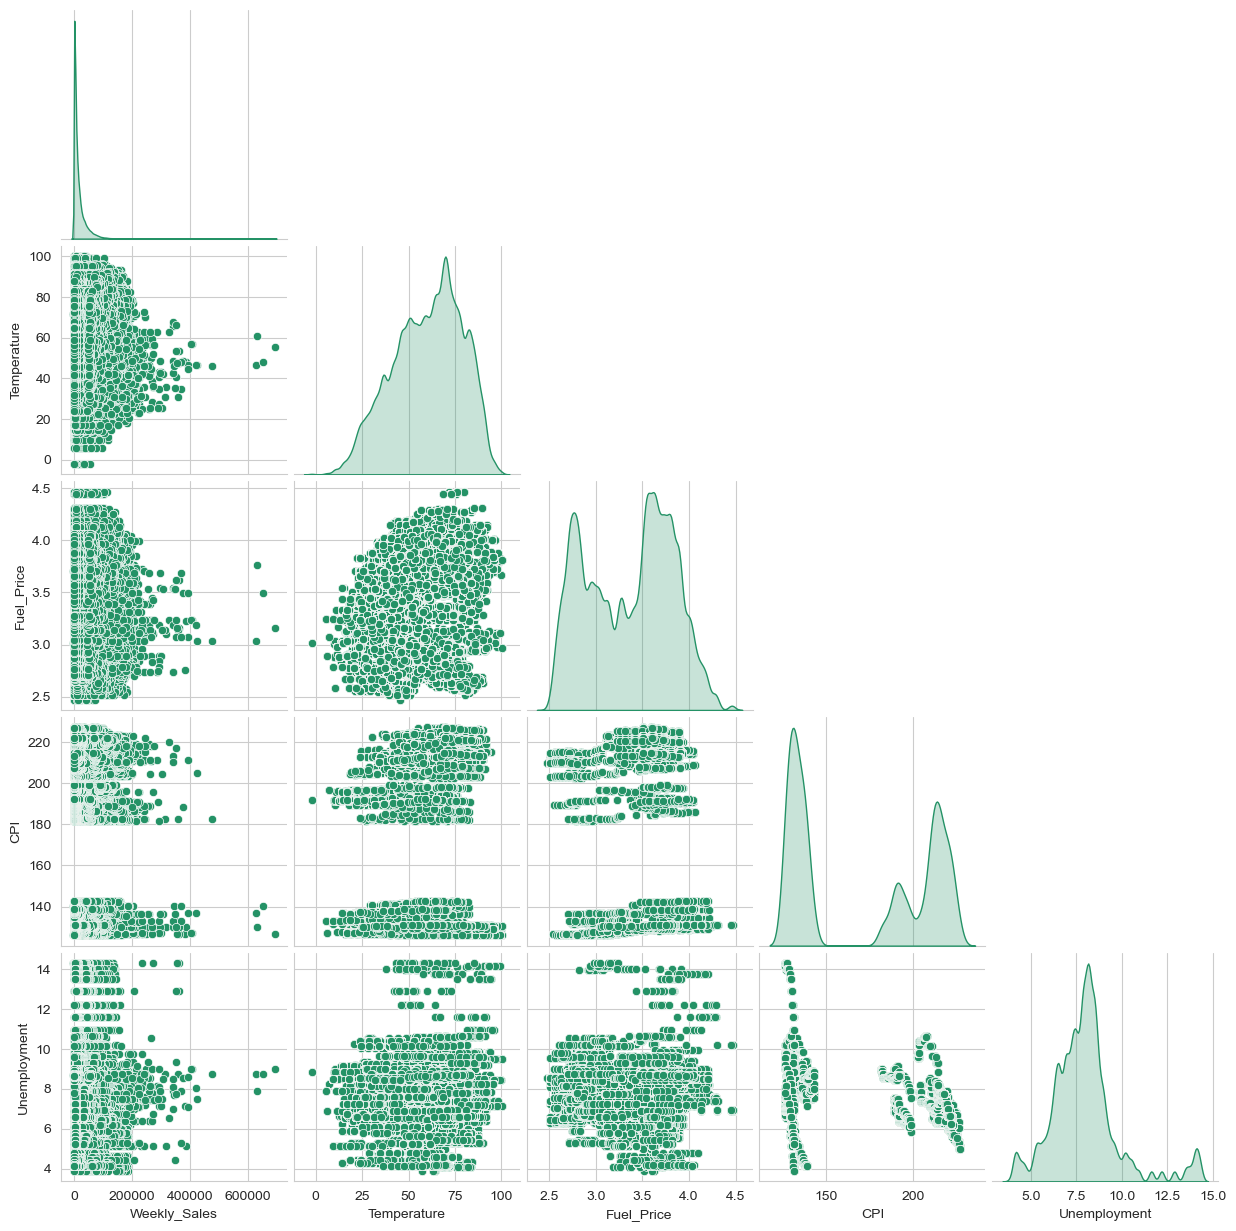

In [91]:
sns.set_palette("summer")
sns.pairplot(train_expanded[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],
             corner=True,diag_kind="kde");

## Output:
The pair plot displays a grid of scatterplots in the lower triangle of the grid, showing the relationships between pairs of variables (Weekly_Sales against other features) using dots.

Along the diagonal of the grid, KDE plots (Kernel Density Estimation) are shown for each variable, representing the distribution of values for each feature. These KDE plots represent smoothed histograms.

The color palette 'summer' is applied to distinguish different plots within the pair plot grid based on the color scheme defined by this palette.

## Observation from Pairplot :There is no particular relationship between these features and target variable. Also, distribution of target variable is highly skewed. That's why, I will not go with linear regression.

## Removing rows with missing values and Calculating the "Absolute Correlation with Weekly Sales and Creating bar plot of Coorelation values"

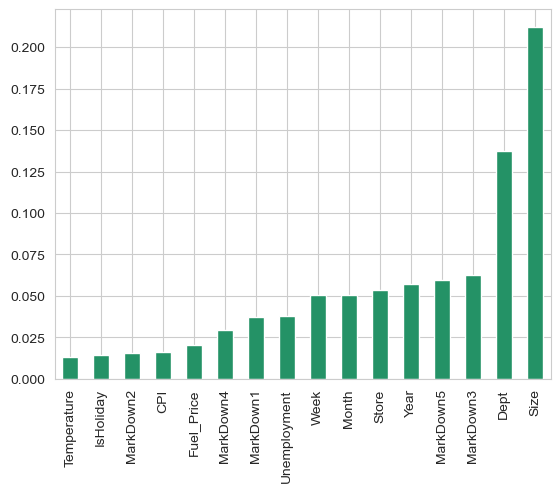

In [92]:
train_expanded.dropna().corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

## Output:
The output of this code is a bar plot where each bar represents the absolute correlation value of a feature with "Weekly_Sales". 

Higher bar heights indicate stronger correlations (either positive or negative) between the respective feature and the target variable. This helps in identifying the most influential features in relation to "Weekly_Sales".

## Observation from above barplot : Size and Department are most correlated with the target variable.

## Using the Heatmap of Coorelation Matrix

The heatmap visualizes the correlation matrix, displaying the correlation coefficients between different pairs of numeric features in the "train_expanded" DataFrame.

Correlation coefficients near 1 or -1 indicate a strong positive or negative correlation respectively, while values near 0 indicate a weak or no linear correlation between the features.

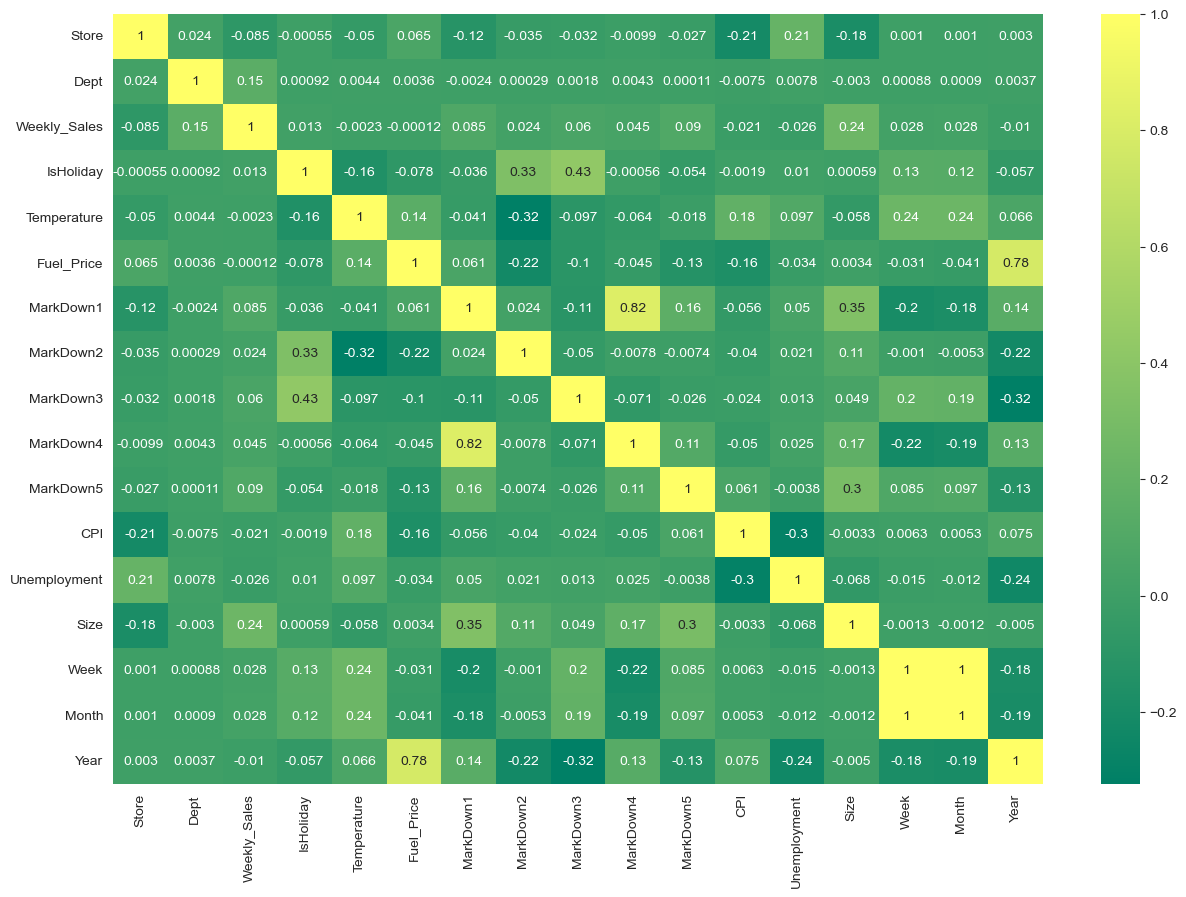

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(train_expanded.corr(),annot=True,cmap='summer');#Calculates the correlation matrix for all numeric columns in the train_expanded DataFrame.

## Output:
The output is a heatmap where each cell represents the correlation between two features. 

"The color intensity and shade in the heatmap cells represent the strength and direction of the correlation: lighter colors indicate higher positive correlation, darker colors represent higher negative correlation, and a neutral color represents weaker or no correlation".

The annotated numbers in the cells provide the actual correlation values, allowing for a quick understanding of the relationships between different features in the dataset.

## Observation from the Heatmap :We can see "1"is the most correlated values among other columns hence we have strong correlation among the given features.

# Data Preprocessing:

## It involves steps and techniques used to prepare and clean raw data to make it suitable for analysis or modeling in machine learning and data science tasks.

In [94]:
!pip install xgboost

In [95]:
# importing necesary library

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## I will Label encode the "IsHoliday and Type feature". From EDA, I concluded to drop Year, CPI, unemployment, temperature and fuel price. I am also dropping all the 'markdown' columns.

# Preprocessing steps

The purpose of this preprocessing function is to transform the input DataFrame by performing label encoding for specific columns ('IsHoliday', 'Type') and removing columns considered less important for further analysis or modeling. 

This prepares the data for downstream analysis or machine learning tasks by converting categorical data into numerical form and reducing the dimensionality of the dataset.

## Using the call class function and Label-encoding

In [96]:
def preprocessor(df):
    # label-encoding for assigning unique numerical variables to categorical data
    df['IsHoliday'] = df['IsHoliday'].astype('str').map({'True':0,'False':1})#This step converts 
     # --                   the 'IsHoliday' column to a string type to ensure consistency.
    df.Type = df.Type.map({'A':2,'B':1,'C':0})#This transformation assigns numerical labels to the
    # -                      different categories in the 'Type' column.
    
# Removes specific columns from the DataFrame that are considered less important for analysis or modeling.
    return df.drop(['Date','Year','MarkDown1','MarkDown2','MarkDown4','MarkDown3','MarkDown5','CPI',
             'Unemployment','Temperature','Fuel_Price'],axis=1)

train_preprocessed = preprocessor(train_expanded)
test_preprocessed = preprocessor(test_expanded)

# DATA SPLITTING

## Purpose of splitting the data into training and testing
The code establishes a machine learning pipeline by splitting the data into features and target variables, then further divides it into training and testing sets. Additionally, it defines functions to evaluate models and display evaluation scores and feature importances if available.

The run_model() function acts as a template to fit a model, make predictions, and assess its performance using mean absolute error(MAE) and R2 score, providing an understanding of the model's predictive capabilities.

The code structure aims to streamline the model evaluation process, allowing easy testing and comparison of various machine learning algorithms.

In [98]:
# splitting data features and target

y = train_preprocessed["Weekly_Sales"]                  #Assigns the target variable 'Weekly_Sales' to the variable y.
X = train_preprocessed.drop(['Weekly_Sales'],axis=1)    #Assigns the features (all columns except 'Weekly_Sales') to the variable X.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# score_calc function for displaying scores:
# Computes evaluation scores for model predictions on the test set.
# Returns Mean Absolute Error (MAE) and R-squared (R2 score) metrics using scikit-learn's 
#--evaluation functions: mean_absolute_error and r2_score.

def score_calc(predictions):
    # Check the shape and type of y_test and predictions
    print("y_test shape:", y_test.shape)
    print("predictions shape:", predictions.shape)
    print("y_test type:", type(y_test))
    print("predictions type:", type(predictions))
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Create a DataFrame with metrics
    scores = pd.DataFrame({'score': [mae, mse, r2]}, index=['MAE', 'MSE', 'R2 Score'])
    
    return scores


# run_model(model, name) Function:
# Builds and evaluates a machine learning model.
# Accepts a model and its name as arguments.
# Fits the model on the training data (X_train, y_train).
# Makes predictions on the test set (X_test).
# If the model has a feature_importances_ attribute (e.g., for tree-based models), it plots a bar graph showing the feature importance.
# Calls the score_calc() function to calculate evaluation metrics based on the model predictions.


def run_model(model,name):
    
    name = model()
    name.fit(X_train, y_train)
    preds = name.predict(X_test)
    try:
        feat_imp = name.feature_importances_
        plt.bar(X_train.columns,feat_imp,color='green')
        plt.title('Feature Importance graph')
        plt.xticks(rotation=45)
    except:
        pass
    return score_calc(preds)

In [99]:
#Preview the preprocessed dataset
train_preprocessed.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Week,Month
0,1,1,24924.50,1,2,151315,5,2
1,1,1,46039.49,0,2,151315,6,2
2,1,1,41595.55,1,2,151315,7,2
3,1,1,19403.54,1,2,151315,8,2
4,1,1,21827.90,1,2,151315,9,3


# MODELLING

## Approach in three ways by using following machine learning algorithms : DecisionTreeRegressor, Random ForestRegressor and KNeighborsRegressor.

Approach-I :Taking all columns

Approach-II :Standardized sized column

Approach-III: Using only Store, Dept and Size columns

## Approach-I :Taking all columns

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,1.955108e+03
MSE,2.100191e+07
R2 Score,9.597256e-01


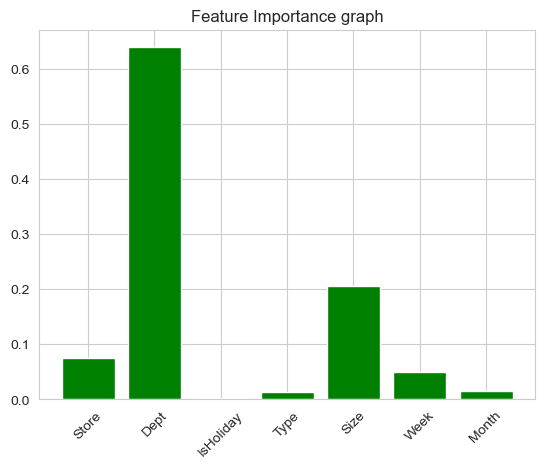

In [100]:
# applying DecisionTreeRegressor algorithm
run_model(DecisionTreeRegressor, 'Decision Tree Regressor')

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,1.784401e+03
MSE,1.728046e+07
R2 Score,9.668621e-01


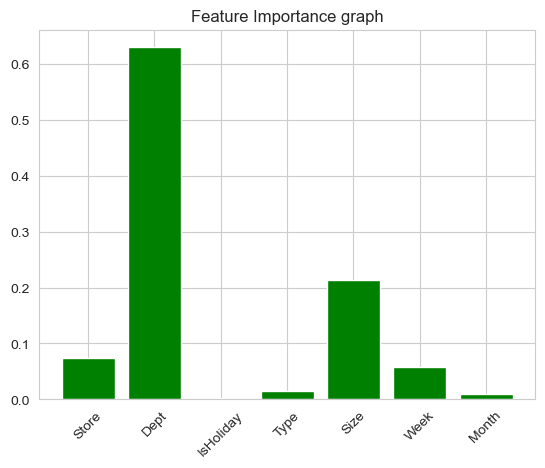

In [101]:
# applying RandomForestRegressor algorithm
run_model(RandomForestRegressor,'rfc')

In [102]:
run_model(KNeighborsRegressor,'knn')

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,5.637797e+03
MSE,1.191363e+08
R2 Score,7.715380e-01


## Approach 2: Standardizing sized column

Here, we can see tree based models do not need feature scaling.

In [103]:
# scaling size column
scaler=StandardScaler()
scaler.fit(train_preprocessed['Size'].values.reshape(-1,1))
X_train['Size'] = scaler.transform(X_train['Size'].values.reshape(-1, 1))
X_test['Size'] = scaler.transform(X_test['Size'].values.reshape(-1, 1))

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,1.953870e+03
MSE,2.094114e+07
R2 Score,9.598422e-01


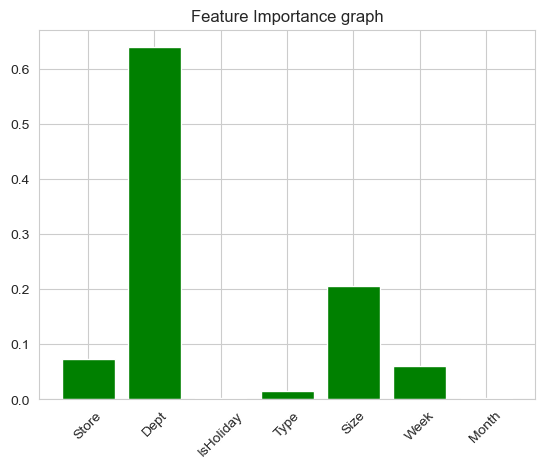

In [104]:
run_model(DecisionTreeRegressor,'dtree')

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,1.784470e+03
MSE,1.732787e+07
R2 Score,9.667712e-01


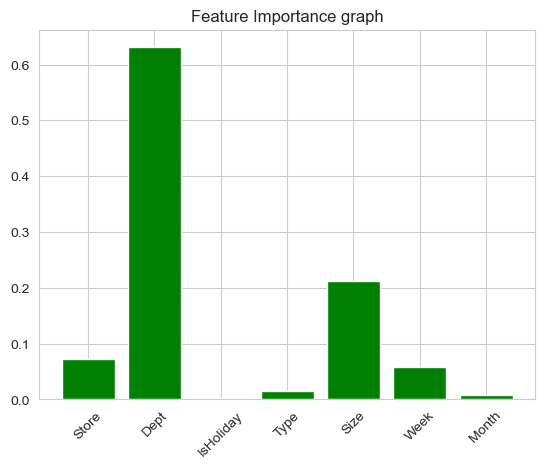

In [105]:
run_model(RandomForestRegressor,'rfc')

In [106]:
run_model(KNeighborsRegressor,'knn') 
#since KNeighbors workes only on seprvised data it is not possible to run this approach 

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,5.453283e+03
MSE,1.137125e+08
R2 Score,7.819390e-01


## Approach-III: Using only Store, Dept and Size columns

In [107]:
X_train = X_train[['Store','Dept','Size']]
X_test = X_test[['Store','Dept','Size']]

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,2.708187e+03
MSE,5.321444e+07
R2 Score,8.979532e-01


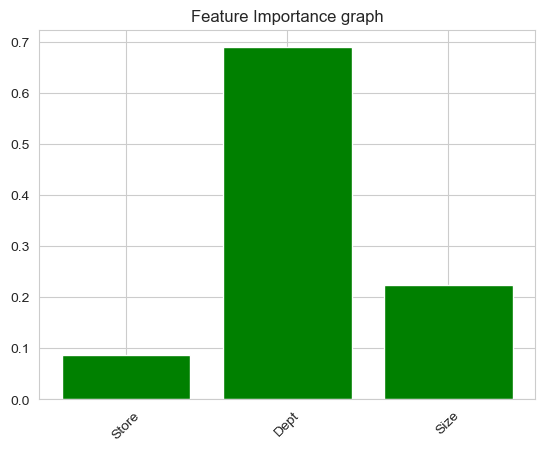

In [108]:
run_model(DecisionTreeRegressor,'dtree')

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,2.708634e+03
MSE,5.322284e+07
R2 Score,8.979371e-01


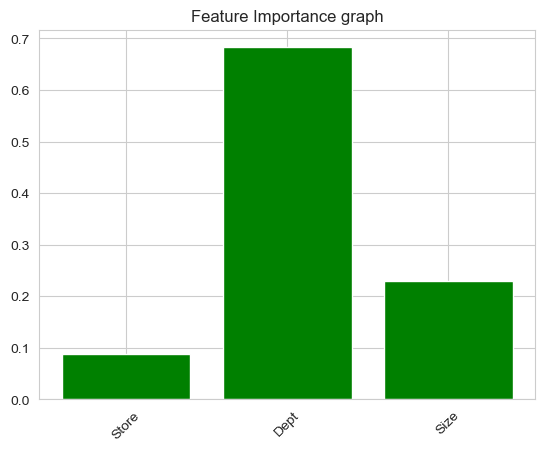

In [109]:
run_model(RandomForestRegressor, 'rfc')

In [110]:
run_model(KNeighborsRegressor,'knn') 

y_test shape: (84314,)
predictions shape: (84314,)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


,score
MAE,3.030238e+03
MSE,6.686917e+07
R2 Score,8.717682e-01


## I tried one hot encoding week feature but score did not improve so I dropped the idea.

In [111]:
dummies=pd.get_dummies(train_preprocessed.Week.astype(str),drop_first=True,prefix='week')
dum_week = pd.concat([train_preprocessed,dummies],axis=1)
dum_week.drop('Week',axis=1,inplace=True)

# Cross- Validation

## Option - A

In [113]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv=4)
print(f"Average 4-Fold CV Score: {score.mean().round(4)}")

Average 4-Fold CV Score: 0.6922


# Hyper parameter tuning

In [ ]:
random_grid = {'n_estimators': [50,60,70],
               'max_features': [3,4],
               'max_depth': [25,30,35],
               'min_samples_split': [3,4],
              'min_samples_leaf':[1,2]}

rf_grid = RandomizedSearchCV(RandomForestRegressor(),
                        random_grid,
                        cv = 4,
                        n_jobs = 5,
                        verbose=True)

rf_grid.fit(X,y)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


## So, cv scored increased after hyper-parameter tuning, so dropped the idea of applying Xgbooster regressor algorithm

In [63]:
#parameters = {'learning_rate': [.03, 0.05, .07],
#               'max_depth': [6,7,8,9],
#               'n_estimators': [500,700]}

#xgb_grid = GridSearchCV(XGBRegressor(),
#                         parameters,
#                         cv = 3,
#                         n_jobs = 5,
#                         verbose=True)

#xgb_grid.fit(X,y)

#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

## Option -B : Cross-validation using kfold

In [64]:
predictor_train_scale = train_preprocessed.drop('Weekly_Sales',axis=1)
predictor_test_scale = test_preprocessed
target_train = train_preprocessed.Weekly_Sales

kf=KFold(n_splits=4,shuffle=True)

preds_3   = list()
y_pred_3  = []
r2_score_ = []
mae=[]

# Applying model on each fold and calculating mean of score
for i,(train_idx,val_idx) in enumerate(kf.split(predictor_train_scale)):    
    
    X_train, y_train = predictor_train_scale.iloc[train_idx,:], target_train.iloc[train_idx]    
    X_val, y_val = predictor_train_scale.iloc[val_idx, :], target_train.iloc[val_idx]
   
    print('\nFold: {}\n'.format(i+1))
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    r2 = r2_score(y_val,rf.predict(X_val))
    mae_ = mean_absolute_error(y_val,rf.predict(X_val))
    r2_score_.append(r2)
    mae.append(mae_)
    preds_3.append(rf.predict(predictor_test_scale[predictor_test_scale.columns]))
    
y_pred_final_3 = np.mean(preds_3,axis=0)    

print('R2 - CV Score: {}'.format((sum(r2_score_)/4)),'\n')
print('MAE Score: {}'.format((sum(mae)/4)),'\n')
print("Score : ",r2_score_)


Fold: 1


Fold: 2


Fold: 3


Fold: 4

R2 - CV Score: 0.968385096602087 

MAE Score: 1770.8147277420308 

Score :  [0.9697646228805972, 0.9657391489465776, 0.9695201459962072, 0.9685164685849663]


## Observation : Here cv score is much higher.

# Creating a line plot to visualize the trend of Actual and predicted weekly_sales over time. 

## The actual sales are based on the "training data", while the predicted sales are based on the "test data" where predictions (y_pred_final_3) have been assigned to the test set. 

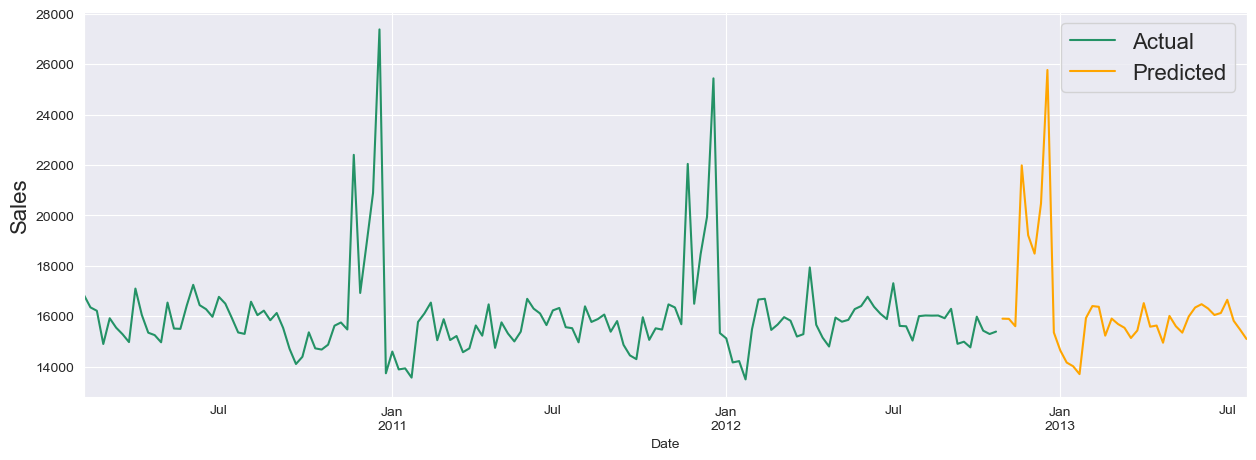

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
test_expanded['Weekly_Sales'] = y_pred_final_3
train_expanded.groupby('Date')['Weekly_Sales'].mean().plot()
test_expanded.groupby('Date')['Weekly_Sales'].mean().plot(color='orange')
plt.legend(['Actual', 'Predicted'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16);

## Output :
The plot provides a comparison between the actual and predicted sales trends, allowing for an assessment of the model's performance in predicting sales over time.

## Observations on the lineplot: We can see that peak sales were during the end of the years(December month) which is especially  festivals season(christmas) and however, sales has been automatically came down at the beginning of the new year or completion of the festivals(January month) and further sales troughout the year as been fluctuating.

# Making final predictions

In [66]:
submission = pd.read_csv('sampleSubmission.csv')
submission['Weekly_Sales'] = y_pred_final_3
submission.to_csv('results_rf_cv_tuned.csv',index=False)